In [1]:
# https://medium.com/neuronio/predicting-stock-prices-with-lstm-349f5a0974d4

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#import pandas_datareader.data as web
import datetime as dt

In [8]:
from tensorflow import keras

from sklearn import linear_model

from keras.models import Sequential

from keras.layers import Dense

import keras.backend as K

from keras.callbacks import EarlyStopping

#from keras.Optimizers import Adam

from keras.models import load_model

from keras.layers import LSTM

from keras.utils.vis_utils import plot_model

In [9]:
df = pd.read_csv("D:\\Stock Data\\TRG.csv")
df.head()

,Date,Symbol,Name,Open,High,Low,Close,Avg.,Turnover,LDCP
0,"Nov 26, 2021",TRG,TRG Pakistan Limited,88.3,90.99,85.70,87.43,88.55,9531136,88.80
1,"Nov 25, 2021",TRG,TRG Pakistan Limited,90.8,91.94,86.80,88.80,89.59,7946662,90.11
2,"Nov 24, 2021",TRG,TRG Pakistan Limited,86.5,94.80,82.20,90.11,88.16,26519206,88.35
3,"Nov 23, 2021",TRG,TRG Pakistan Limited,94.0,95.39,88.35,88.35,91.57,19634226,95.51
4,"Nov 22, 2021",TRG,TRG Pakistan Limited,96.0,98.48,95.51,95.51,96.15,22372983,103.25


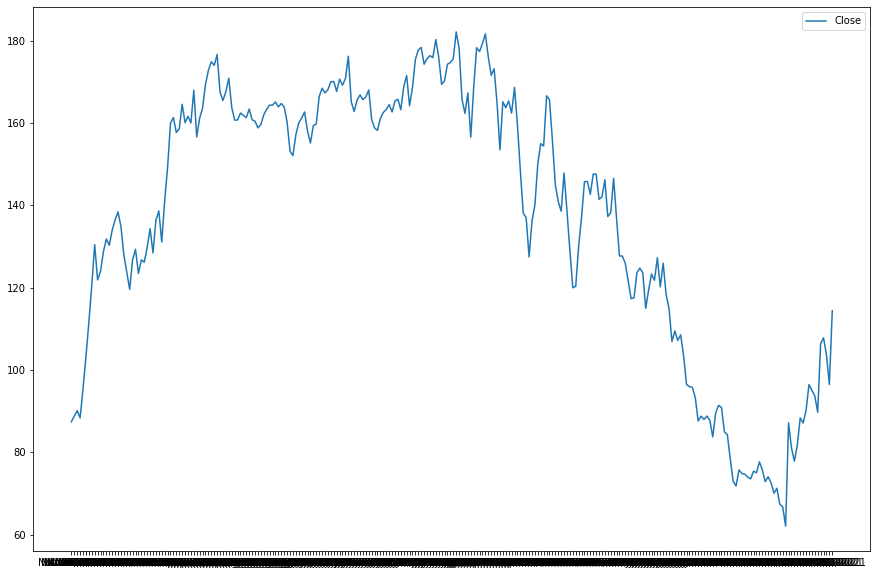

In [10]:
plt.figure(figsize = (15,10))
plt.plot(df['Date'], df['Close'], label='Close')
plt.legend(loc='best')
plt.show()

In [11]:
df['MA_window_10'] = df['Close'].rolling(10).mean().shift() #shift so the day we want to predict won't be used
df['MA_window_20'] = df['Close'].rolling(20).mean().shift()

# Preparing Data for Classification

In [ ]:
# Split the data into train and test with 90 & 10 % respectively
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

# LSTM 

In [14]:
look_back = 40
forward_days = 10
num_periods = 20

In [16]:
NUM_NEURONS_FirstLayer = 128
NUM_NEURONS_SecondLayer = 64
EPOCHS = 220
#Build the model
model = Sequential()
model.add(LSTM(NUM_NEURONS_FirstLayer,input_shape=(look_back,1), return_sequences=True))
model.add(LSTM(NUM_NEURONS_SecondLayer,input_shape=(NUM_NEURONS_FirstLayer,1)))
model.add(Dense(forward_days))
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X_train,y_train,epochs=EPOCHS,validation_data=(X_validate,y_validate),shuffle=True,batch_size=2, verbose=2)

NameError: name 'X_train' is not defined